In [1]:
#Reference: https://towardsdatascience.com/feature-importance-with-neural-network-346eb6205743

In [2]:
import pandas as pd
#from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np

In [3]:
A_df = pd.read_csv('SP500.csv', thousands=',')
A_df = A_df.rename(columns={'ticker_region': 'ticker','proper_name':'company_name','ff_fiscal_date':'Date','currency':'Currency','ff_price_close_fp':'Closing Price','ff_mkt_val':'Market Value','ff_sales':'Sales','ff_oper_exp_tot':'Operating Expenses','ff_oper_inc':'Operating Income','ff_ebit':'EBIT','ff_ptx_inc':'Pretax Income','ff_inc_tax':'Income Tax','ff_net_income':'Net Income','ff_ebit_oper_mgn':'Operating Margin','ff_gross_mgn':'Gross Margin','ff_eps_basic':'EPS'})
A_df = A_df.drop(A_df.columns[[1,14]], axis='columns').dropna(axis=0)
A_df.head()

ticker                company_name       Date Currency  Closing Price  \
0   A-US  Agilent Technologies, Inc.  1/31/2005      USD          22.11   
1   A-US  Agilent Technologies, Inc.  4/30/2005      USD          20.75   
2   A-US  Agilent Technologies, Inc.  7/31/2005      USD          26.24   
4   A-US  Agilent Technologies, Inc.  1/31/2006      USD          33.91   
5   A-US  Agilent Technologies, Inc.  4/30/2006      USD          38.42   

   Market Value   Sales  Operating Expenses  Operating Income   EBIT  \
0       10856.0  1658.0              1556.0             102.0  102.0   
1       10188.3  1688.0              1600.0              88.0   88.0   
2       12962.6  1688.0              1558.0             130.0  130.0   
4       17701.0  1336.0              1252.0              84.0   84.0   
5       16366.9  1431.0              1309.0             122.0  122.0   

   Pretax Income  Income Tax  Net Income  Operating Margin  Gross Margin  \
0          124.0        21.0       103.0              6.15         45.48   
1          120.0        25.0        95.0              5.21         46.86   
2          129.0        25.0       104.0              7.70         46.27   
4           93.0        15.0       985.0              6.29         51.57   
5          159.0        28.0       131.0              8.53         51.78   

      EPS  
0  0.2100  
1  0.1900  
2  0.2100  
4  2.0824  
5  0.3046

In [4]:
feature_raw = A_df.drop(A_df.columns[[0,1,2,3,4,7,9,10,11]], axis = 'columns')
feature_raw

Market Value   Sales  Operating Income  Net Income  Operating Margin  \
0           10856.0  1658.0             102.0       103.0              6.15   
1           10188.3  1688.0              88.0        95.0              5.21   
2           12962.6  1688.0             130.0       104.0              7.70   
4           17701.0  1336.0              84.0       985.0              6.29   
5           16366.9  1431.0             122.0       131.0              8.53   
...             ...     ...               ...         ...               ...   
39380       31104.2  1347.0             465.0       298.0             34.52   
39381       35020.8  1460.0             509.0        81.0             34.86   
39382       40479.3  1366.0             461.0       352.0             33.75   
39383       41086.3  1415.0             484.0       384.0             34.20   
39384       44038.6  1480.0             529.0       347.0             35.74   

       Gross Margin     EPS  
0             45.48  0.2100  
1             46.86  0.1900  
2             46.27  0.2100  
4             51.57  2.0824  
5             51.78  0.3046  
...             ...     ...  
39380         66.00  0.6100  
39381         67.12  0.1700  
39382         65.59  0.7200  
39383         66.78  0.7900  
39384         65.88  0.7199  

[33932 rows x 7 columns]

In [5]:
feature_raw.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Market Value</th>\n      <th>Sales</th>\n      <th>Operating Income</th>\n      <th>Net Income</th>\n      <th>Operating Margin</th>\n      <th>Gross Margin</th>\n      <th>EPS</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1.085600e+04</td>\n      <td>1658.000000</td>\n      <td>102.000000</td>\n      <td>103.000000</td>\n      <td>6.15</td>\n      <td>45.48</td>\n      <td>0.2100</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1.018830e+04</td>\n      <td>1688.000000</td>\n      <td>88.000000</td>\n      <td>95.000000</td>\n      <td>5.21</td>\n      <td>46.86</td>\n      <td>0.1900</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1.296260e+04</td>\n      <td>1688.000000</td>\n      <td>130.000000</td>\n      <td>104.000000</td>\n      <td>7.70</td>\n      <td>46.27</td>\n      <td>0.2100</td>\n    </tr>\n    <tr>\n      <th>4</

## MultiLinear Regression Test

In [6]:
list(feature_raw.columns)

['Market Value',
 'Sales',
 'Operating Income',
 'Net Income',
 'Operating Margin',
 'Gross Margin',
 'EPS']

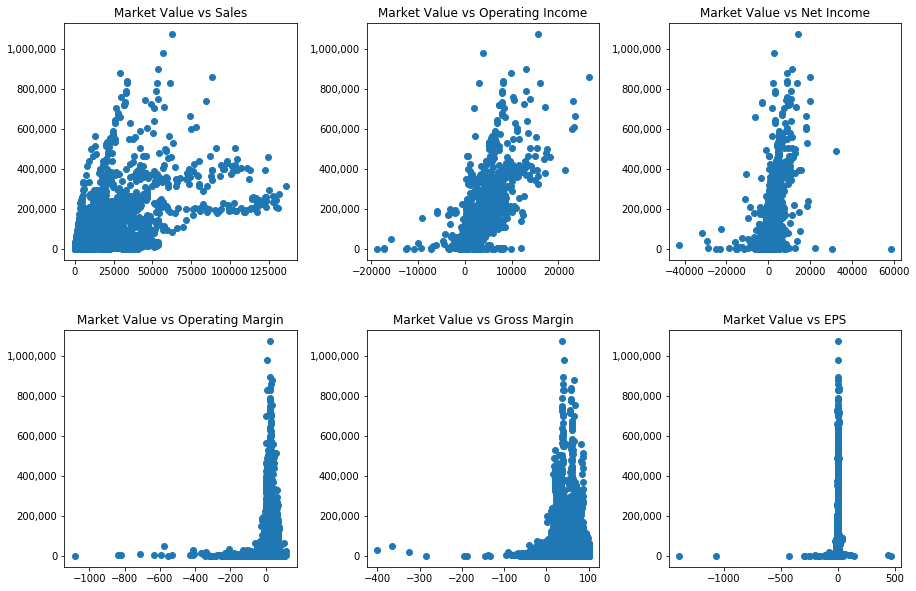

In [7]:
import matplotlib
factor_list = list(feature_raw.columns)
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1,7):
    ax = fig.add_subplot(2, 3, i)
    ax.scatter(feature_raw.iloc[:, i], feature_raw['Market Value'])
    ax.set_title("Market Value vs " + factor_list[i])
    
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
    #fig.savefig('Image/Feature_Scatter.png')

## Correlation Matrix

In [8]:
feature_raw.corr(method='pearson')

Market Value     Sales  Operating Income  Net Income  \
Market Value          1.000000  0.642475          0.811880    0.602530   
Sales                 0.642475  1.000000          0.702684    0.484734   
Operating Income      0.811880  0.702684          1.000000    0.745142   
Net Income            0.602530  0.484734          0.745142    1.000000   
Operating Margin      0.095047 -0.028683          0.165895    0.128409   
Gross Margin          0.105569 -0.149906          0.098212    0.090741   
EPS                   0.027029  0.016523          0.032989    0.083742   

                  Operating Margin  Gross Margin       EPS  
Market Value              0.095047      0.105569  0.027029  
Sales                    -0.028683     -0.149906  0.016523  
Operating Income          0.165895      0.098212  0.032989  
Net Income                0.128409      0.090741  0.083742  
Operating Margin          1.000000      0.425210  0.047349  
Gross Margin              0.425210      1.000000  0.029365  
EPS                       0.047349      0.029365  1.000000

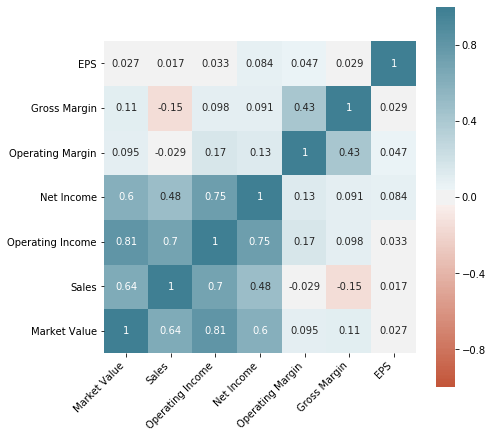

In [12]:
import seaborn as sns
plt.figure(figsize=(7,7))
ax = sns.heatmap(
    feature_raw.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
)
ax.set_ylim(0, 7)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

figure = ax.get_figure()    
figure.savefig('Image/Feature_Heatmap.png', dpi=400, bbox_inches='tight', pad_inches=0.0)

In [62]:
# Conclusion - Correlation with Market Value: Operating Income (>0.8) > Sales (>0.6) > Net Income (>0.6)

## Gradient Boosting Feature Importance

In [63]:
X = feature_raw.drop(feature_raw.columns[[0]], axis = 'columns')
X

Sales  Operating Income  Net Income  Operating Margin  Gross Margin  \
0      1658.0             102.0       103.0              6.15         45.48   
1      1688.0              88.0        95.0              5.21         46.86   
2      1688.0             130.0       104.0              7.70         46.27   
4      1336.0              84.0       985.0              6.29         51.57   
5      1431.0             122.0       131.0              8.53         51.78   
...       ...               ...         ...               ...           ...   
39380  1347.0             465.0       298.0             34.52         66.00   
39381  1460.0             509.0        81.0             34.86         67.12   
39382  1366.0             461.0       352.0             33.75         65.59   
39383  1415.0             484.0       384.0             34.20         66.78   
39384  1480.0             529.0       347.0             35.74         65.88   

          EPS  
0      0.2100  
1      0.1900  
2      0.2100  
4      2.0824  
5      0.3046  
...       ...  
39380  0.6100  
39381  0.1700  
39382  0.7200  
39383  0.7900  
39384  0.7199  

[33932 rows x 6 columns]

In [64]:
y = feature_raw['Market Value']
y.head()

0    10856.0
1    10188.3
2    12962.6
4    17701.0
5    16366.9
Name: Market Value, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

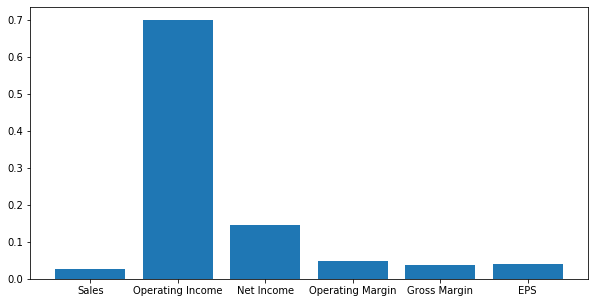

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
plt.figure(figsize=(10,5))
plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['Sales','Operating Income','Net Income','Operating Margin','Gross Margin','EPS'])
plt.savefig('Image/Feature_Bar.png', dpi=400)

In [15]:
#Conclusion - The higher the value, the high its impact on Stock Price Prediction: Operating Income > Net Income
#Operating Margin; which is different from the correlation matrix, so high correlation doesn't necessarily mean there is a high
#prediction power

In [16]:
print(f"Training Data Score: {gb.score(X_train, y_train)}")
print(f"Testing Data Score: {gb.score(X_test, y_test)}")

Training Data Score: 0.9032097631975128
Testing Data Score: 0.8522099436072683
